# CIFAR-10 + Keras

Reconhecimento de objetos com visão computacional.

## Declaração de Classe para Predições em Tempo Real

A tarefa de implantação cria um serviço REST para predições em tempo-real.<br>
Para isso você deve criar uma classe `Model` que implementa o método `predict`.

In [1]:
%%writefile Model.py

import joblib
import numpy as np
import cv2
import base64
import tensorflow as tf

class Model:
    def __init__(self):
        artifacts = joblib.load("/tmp/data/model.joblib")
        self.model_path = artifacts["model_path"]
        self.class_names = artifacts["class_names"]

    def class_names(self):
        return ["predicted_class", "probability"]
        
    def predict(self, X: bytes, feature_names, meta=None):
        # Carregamento do modelo
        model = tf.keras.models.load_model(self.model_path)
        # Converte image array do buffer pra memória 
        im_bytes = X
        im_arr = np.frombuffer(im_bytes, dtype=np.uint8)
        image = cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR)
        
        # Cria tensor com imagem para enviar de entrada pro modelo
        input_image = tf.expand_dims(image, axis=0)
        
        # Predição do modelo
        prediction = model.predict(x=input_image)
        indx = np.argmax(prediction)
        predicted_class = self.class_names[indx]
        return [[predicted_class, prediction[indx]]]

Overwriting Model.py



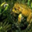

In [2]:
import base64
b64_image = "iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2jAAAAB3RJTUUH2AcTCiIb4nUamQAACalJREFUSIkFwVlvZFdCAOCz3XPufm/dqrLLW2x3291tJz3pToKUjNAAQiAWjUZCCBASz/DHkHjkgTeEYHhBGYimM5l003R736psV919OTvfB3e/jNNJbAXwEEvHzsnZw+2cs8DOMgYU7Ormyf6aBuZx2TUNqNt+OnV/crQLIK7bDiLycL9IpnQyS+8v8jQa316sSlP98V+/nPrsX/75TT5XRErBCItD1ixLn7L9vVmvr4JUeRg6gAa+j6kcuFFAZ2M3G6EkJFYUbhB5kyAv643NJFnzAQEsoEVVPC6XZEJari/efRCNiEOEDAe6RxAsXn5mfvpl8nTmP9tYn3h+FEYYU+r4GLnj6QxhYFU1CeVO5sQEDPkywBgKHlEUMxcbB1mna/qN2fjoaD8IEyEcgtjTg5g4GHlU/uLnx4e77nf/dero+IuDZ/f16X0nrbRaYwfHvhsRiMY+frmf+QBQwu4Md203DQhQtTOQxAmBHwRrdjqeOBue5zJkWRgHB8cpPv6K/u3fvfzmi+e//Pcr4r56/fqPPn+9/+VPo7cnZ6cf7zzmQgvv75dG1D97vfc7zzY8U48ju701otREAVyPFAE9xZABq3j3MJ/3oBTQ1I8miNjuoSYvjsdPnkT/9I+//Hjq/vlfvPyPb7/n/OLZ58ANGcSKixJYq41yEZwl3tQniJpoQjrNozR9KAcGTRRFrZB53vuUIji0qitub1VPAYSEjfHRq8nH3y5/+G0ulJMmo9OLN17W5UP1w9t7jzCkgDZEyPb5TvZkzYH8EWg5CDBwME3HkI3KWoq2i31JHZMkMSBWA0sMODrcr0W7tbuHNw781YPopJZaNDWnyfzrP0yvLvn/vVtijZEhkoOxj786jsrHJSA0HYe8JRcnS15Uzz975gYRVEqJldFGG9pxlaSZhwA0qiPqsRR451WsDe0HW9RV3eWvvomA0/74ayV71pZ95MajaBIovjlpbq7l+wtnspGNvND0Toi7ZKwIo3s72x4WXc3n95VQSgu5FgVtuaplfXVR4E//YHr6sb676q3Fe0fx5m5y8UFffUDQQATwwd4hkHJvTX71hYvh5FffPTru0FdLo8A3X227mb6bl83jcn3iRmFklEVAiXZIGN2Z+LMslg0lrut2fd5UfLq+Bgj7t3896wuXV9SlPaWuNnbo261X3uYus1r//u+GUQJG8WhxtTpdrMZeZpSwqqPYaUSTMJ64jBol+xo7HlV6L4vxaNdf3DVZ5G3uxmdX1eOdQlhS4jACICS87yxvhq4nJjFt9fUXO4rrfCCEsbwY3p13HoJPt2IHV1J2DGgHKkwosAAD2PX8Jl/idCMYWjUdB3lRVoUllmEim6ZH0JNcA8G3R7FU7nyhu0b3ihicSki40f97Uvzm46Pi/dFuGiCNLORDr7VtO4scBiwfx0TTiDzbPcDi5ubmhnkORbapK61JGHiPy5Y6aHtv5jLv/PaeUND06D+/fwugs7URpym5ztvtg63RCJ/eta1rKFIc2EGjVSkdDzNHTyYhXNvDfsrOTm6HTm7uZEGErQUYA4cgaAllFGB0cnrVC5WN0jhiy9Xq+qE9Oa8f5/lf/tVP/uHv/0ZL9e2b99eroRfGUn9RKceLyqYNIt/x3Y/zgVyePdT5QKlTLHvmYWxZUZTBesSYwYwoCDsLQ4euyjaJsigde6LiwHn9avZnf7rz5BPw4xt2WWljyGOlNwSyJLDlQJHdcdOH+072DulKDiTEFDWl6iojuO65qVlPGFTQIELWN2dN2azKtm+4saAVFhLz6dH6yO0e794GYZZkez+8vygxen/7wFw0cs3nzxKC3fvbfF62WGvjeW46CjDGWuK+HYxWceo41Om5chBez9LVsgqD8H6eLxa1dWgUgIPxsJMhJdC3v26UDKIg/fb704tFW9X8YD872AmQEFfn9dWqRxhjBJHRplgW+XIFsRyvEcaA5CjwAj3IalkZZYQyG1vrlDlW48h3p0nw8U19/qHte5p4cbdasSCGLInieG93poQsqvKqqL21MdECtrIb+hYgkE08PzaeD5taa2ugUNDCxaqKQp9gUOVNmnjhdMzVSmMH+bjqyc1jcTNvTi4W2xtbAesitNoZjbB1LueXZOQevZghC5QxGmM02xjHaeg42CEupa4fwL5vtVEW6Z63SRoqzQGyEEjGcNXLStlC4B/fn18tln6cXV1cXl9cImy5Ar3y5oUYTVPiuDiIsevhMPAQwULyyTRua5kvB+YjwYVWmlKqlIDIUEYgsEqrwyfrQHRlzQvhvHm3WC5bJXVRlNSlYeJyLm5uHqRR21ubZ9ct2X+aZeP0fl6fX949/3RnPE4vTh88N/ZYML+plTDCA6OxjzGejkdVUfp+6FGmwPDu/KEU7fyhbmvuYPTJ9lqYJhoO//PuJvPYdKTbTv/qzTnyAmd9I2EuWJ8F44l/dXkHIHxxtFutGtkbimhf8+VDyzkE0Nn+ZPuT3Z2q5twyGs24dpnnp6PIIShwfd6IPB96zW4fOj6o//7uQ94MeGs30aZvmm62Oen6bnFfHhxuGztUZbmzO52uhUoPs60dh/rnZ5eexyh1LSR5WVtL82IIkjCIfGRQtaybamj6gYXh7kb2e1+/uH9UORcEYZgXlbHYZbSuiqd7U88DTdO9ON7QWtwvcowNRIhzCTVpKwltAQngAmgpHEIFH7QyWZbe1vO6GKwDnbH69HhfKNMKO/ABH3wWHr44qOvBarEzmyKghqZen46NsavVQ1UOfYOVRkpK2cmuHkZpfHR8qCWoym7oRN905aoeeiGEFoMxSj4/nHoeev/xelU1hCLy5Pl4f282n8+RBQCZsqySJCnL4fouH/hAMEEQp0mqtW7yui77i/ObQfWu6wqpbm8XagBGgR5xo602Jh4xP3RXZb8sVF6IySzGP/uT7bc/nojB1FXddx1CsKrk6ekKQhzHvu8FRjmL+eNqmTPXscDmRV3UJaF4lI2ElH0hjLTAQGtAkNKnxxvSSgPoctkJ0SejAPuZvruutXIwQpTgthNNreNoxJgjBrVaDgjQoR+UHlzPYZ5DXYqpo42K05APvKkahwLqwjTzspkfZW5Vtbe3eRDSyQQYoHCUOU0FrIFaW0Ko1HKUTbtWPSzKoui6RjgOTVJGHCO1ikfs+fEzPwi10RABrQ2AajqLR2vhaMqYT/qOGy2lGIIQZRnL8wY/f7lmNARQVcXQtXK6Ho/H09+8ORt6paTGiFBKxmMfQE1dh/owCCOIGB/6pmnSNGI+DZMAQKChDLwgf2g8F6+t+RgrPliMvP8H6ejP2eqcw4cAAAAASUVORK5CYII="
X = base64.b64decode(b64_image)
from IPython.core.display import display, HTML
display(HTML(f'<img src="data:image/png;base64,{b64_image}" />'))

In [ ]:
from Model import Model
model = Model()
response = model.predict(X, None)
response